In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline
%matplotlib inline
from SimpleCV import *
disp = Display(displaytype='notebook')
import seaborn as sns
import glob
import json

Populating the interactive namespace from numpy and matplotlib


In [28]:
from autopump import autopump

In [29]:
AP = autopump.AutoPump()

In [30]:
def returnCalibrationCurve(imgdir):
    #returns calibration curve from an image directory.  Assumes imgs are named XXml.jpg where XX is the volumne in ml
    imgs = glob.glob(imgdir + '/*.*')
    vols = list()
    out = list()
    for imgfile in imgs:
#        img = Image(imgfile)
#        AP.img = img
        out.append(AP.processVision(imgfile))
        vols.append(imgfile.split('ml')[0].split('/')[-1])
    out = np.array(out)
    return [out,np.array(vols).astype('int64')]

In [32]:
returnCalibrationCurve('/Users/ryan/Code/DataDumps/AutoPump/camtesting/inRoomTesting/run1/')

[array([[  944.        ,   304.18709886],
        [  660.        ,   381.60775496],
        [  330.        ,   471.56837648],
        [    0.        ,   561.528998  ],
        [ 1504.        ,   151.52665022]]), array([175, 280, 375, 470,  95])]

In [33]:
out1,vols1 = returnCalibrationCurve('/Users/ryan/Code/DataDumps/AutoPump/camtesting/inRoomTesting/run1/')
out2,vols2 = returnCalibrationCurve('/Users/ryan/Code/DataDumps/AutoPump/camtesting/inRoomTesting/run2/')
#out3,vols3 = returnCalibrationCurve('GaugeRR/run3/')

In [34]:
fit = np.polyfit(out1[:,0], np.array(vols1),1)

In [41]:
AP.saveConfig()

[autoreload of autopump.autopump failed: Traceback (most recent call last):
  File "/Library/Python/2.7/site-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
ImportError: No module named smbus
]


TypeError: <SimpleCV.Image Object size:(1944, 2592), filename: (None), at memory location: (0x11aba2dd0)> is not JSON serializable

In [50]:
#del tmp['img']
tmp['breathCounter'] = tmp['breathCounter'].value

In [53]:
tmp.keys()

['imagesDir',
 'outputFile',
 'humanBPM',
 'heightToMl',
 'servoMin',
 'breathTime',
 'ballHeight',
 'mls',
 'breathCounter',
 'maxFluidLevel',
 'configFile',
 'servoSlack',
 'cylinderROI',
 'servoMax',
 'threshold',
 'sampleRate',
 'saveImages',
 'runMotor']

In [51]:
tmp

{'ballHeight': 31,
 'breathCounter': -1.0,
 'breathTime': 0.25,
 'configFile': 'run_2015_11_07-11-37-17.cfg',
 'cylinderROI': [150, 850, 350, 2000],
 'heightToMl': [-0.272607944, 561.528998],
 'humanBPM': 15,
 'imagesDir': 'imageoutput',
 'maxFluidLevel': 550,
 'mls': 553.078151736,
 'outputFile': 'run_2015_11_07-11-37-17.csv',
 'runMotor': True,
 'sampleRate': 10,
 'saveImages': False,
 'servoMax': 325,
 'servoMin': 275,
 'servoSlack': 400,
 'threshold': -0.25}

In [45]:
tmp['img'] = []

In [43]:
tmp = AP.__dict__

In [35]:
fit

array([ -2.56861600e-01,   4.55618036e+02])

In [36]:
np.polyval(fit,800)

250.12875621436939

In [ ]:
fit

In [38]:
fity = np.linspace(1300,100)
fitx = list()
for fy in fity:
    fitx.append(np.polyval(fit,fy))

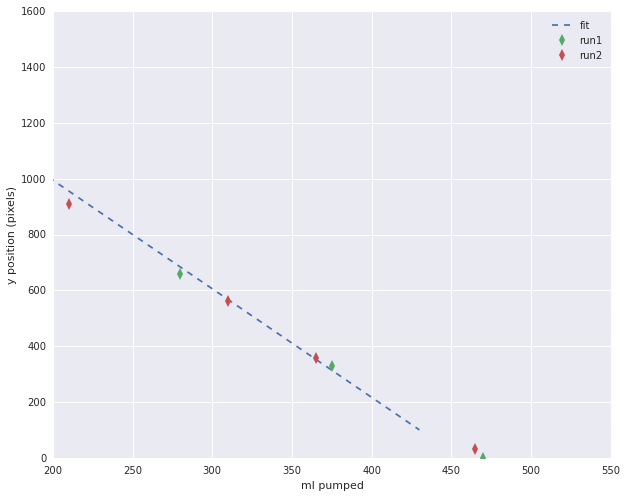

In [40]:
plt.figure(figsize=(10,8))
plt.plot(fitx,fity,'--',label='fit')
plt.plot(vols1,out1[:,0],'d',markersize=8,label='run1')
plt.plot(vols2,out2[:,0],'d',markersize=8,label='run2')
#plt.plot(vols3,out3[:,0],'d',markersize=8,label='run3',)
plt.legend()
#plt.legend({'fit','run1','run2','run3'})
plt.axis([200,550,0,1600])
plt.xlabel('ml pumped')
plt.ylabel('y position (pixels)')
plt.show()

In [29]:
img = Image('115ml.jpg')
img = img.rotate270()
cylinder = img.crop([100,480,400,2000])
ballimg = cylinder.hueDistance(color=(130,110,55)).invert()
channels = cylinder.splitChannels()
#blobs = red_channel.findBlobs(threshold)

IOError: [Errno 2] No such file or directory: '115ml.jpg'

In [23]:
img = Image('/Users/ryan/Code/DataDumps/AutoPump/camtesting/inRoomTesting/run2/465ml.jpg')
#img = Image('../../../DataDumps/AutoPump/camtesting/pingpong/GaugeRR/run1/115ml.jpg')
img = img.rotate270()

cylinder = img.crop([150,850,350,2000]) #extents for image 
bluechan = cylinder.getNumpy()[:,:,0]
bluechan = bluechan.mean(axis=1)
smoothb = smooth(bluechan,window_len=50)
try:
    ballheight = np.nonzero(np.diff(smoothb) < -0.15)[0][0] #get first y value that exceeds thrshold 
except:
    logging.warning('Machine vision failure: ball not detected')
    ballheight = -1

#mls = ballheight * self.heightToMl

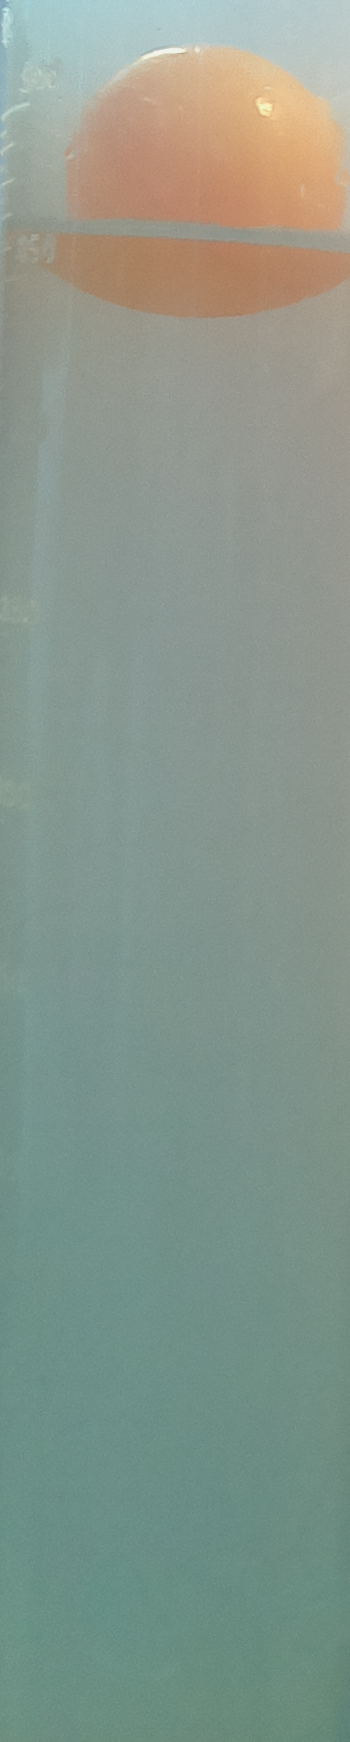

In [24]:
cylinder.save(disp)

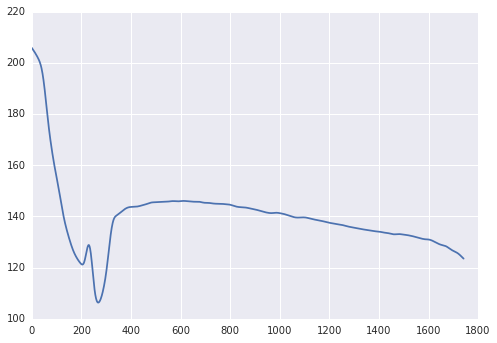

In [25]:
plt.plot(smoothb)

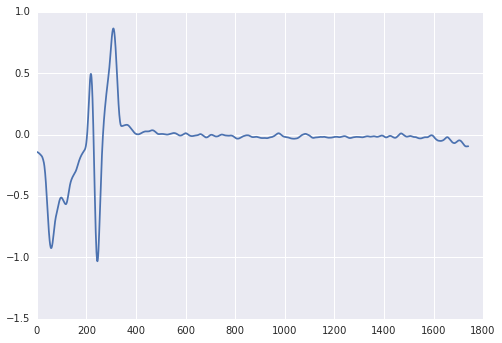

In [26]:
plt.plot(diff(smoothb))

[0, 2000, -0.6, 0.8]

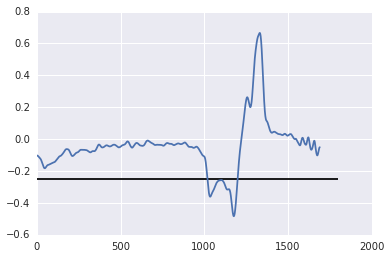

In [65]:
plt.plot(diff(smoothb))
plt.hlines(-0.25,0,1800)
plt.axis([0, 2000, -0.6, 0.8])

In [ ]:
ballheight

In [ ]:
cylinder.save(disp)

In [ ]:
r = cylinder.getNumpy()[:,:,2]
r = r.mean(axis=1)
g = cylinder.getNumpy()[:,:,1]
g = g.mean(axis=1)
b = cylinder.getNumpy()[:,:,0]
b = b.mean(axis=1)



In [ ]:
plt.plot(r,'r')
plt.plot(g,'g')
plt.plot(b,'b')

In [10]:
def smooth(x,window_len=11,window='hanning'):
        if x.ndim != 1:
                raise ValueError, "smooth only accepts 1 dimension arrays."
        if x.size < window_len:
                raise ValueError, "Input vector needs to be bigger than window size."
        if window_len<3:
                return x
        if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
                raise ValueError, "Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'"
        s=numpy.r_[2*x[0]-x[window_len-1::-1],x,2*x[-1]-x[-1:-window_len:-1]]
        if window == 'flat': #moving average
                w=numpy.ones(window_len,'d')
        else:  
                w=eval('numpy.'+window+'(window_len)')
        y=numpy.convolve(w/w.sum(),s,mode='same')
        return y[window_len:-window_len+1]

In [ ]:
smoothb = smooth(b,window_len=50)

In [ ]:
plt.plot(smoothb)

In [ ]:
#plt.plot(tmp)
plt.plot(np.diff(smoothb))

In [ ]:
np.nonzero(np.diff(smoothb) < -0.15)[0][0]

In [ ]:
cylinder.save(disp)